In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import fashion_mnist

C:\Users\f4020\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

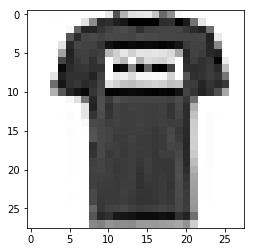

In [4]:
plt.imshow(x_train[1], cmap='Greys');

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [7]:
x_train[1].shape


(28, 28, 1)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(32, (3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [29]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [30]:
model.add(Conv2D(64, (3,3), padding='same',
                activation='relu'))

In [31]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [32]:
model.add(Conv2D(128, (3,3), padding='same',
                activation='relu'))

In [33]:
model.add(MaxPooling2D(pool_size=(2,2)))


In [34]:
model.add(Flatten())

In [35]:
model.add(Dense(64, activation='relu'))

In [36]:
model.add(Dense(10, activation='softmax'))


In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
__________

In [38]:
model.compile(loss='mse', optimizer=SGD(lr=0.05),
             metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


In [39]:
model.fit(x_train, y_train, batch_size=128, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 131s 2ms/sample - loss: 0.0896 - acc: 0.2445
Epoch 2/15
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.0887 - acc: 0.3820
Epoch 3/15
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.0865 - acc: 0.3889
Epoch 4/15
60000/60000 [==============================] - 119s 2ms/sample - loss: 0.0760 - acc: 0.4213
Epoch 5/15
60000/60000 [==============================] - 120s 2ms/sample - loss: 0.0527 - acc: 0.6287
Epoch 6/15
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.0406 - acc: 0.7089
Epoch 7/15
60000/60000 [==============================] - 119s 2ms/sample - loss: 0.0374 - acc: 0.7303
Epoch 8/15
60000/60000 [==============================] - 119s 2ms/sample - loss: 0.0354 - acc: 0.7452
Epoch 9/15
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.0338 - acc: 0.7578
Epoch 10/15
60000/60000 [==============================] - 119s 2ms/sampl

In [40]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 8s 810us/sample - loss: 0.0310 - acc: 0.7825


In [41]:
loss, acc = score

In [42]:
print('測試資料的正確率為', acc)

測試資料的正確率為 0.7825
